<a href="https://colab.research.google.com/github/Tonoyama/2020AB/blob/master/OC_Z_2021_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Z 号館 2021-07-05 のデータ可視化

## ライブラリのダウンロードとインポート

In [ ]:
!pip install --upgrade plotly
!pip install japanize_matplotlib

     |████████████████████████████████| 20.6MB 137kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 4.1MB 4.0MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=3d7fed3d8ad0a8644e1c9db2b3d3ac273d140d4cfe6c8eb6ac904e4054031c4b
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import japanize_matplotlib 
import seaborn as sns

sns.set(font="IPAexGothic")

## データのダウンロードと整形


### Web サーバの取得データ(**`df_rasp`**)


2台の Raspberry Pi から受け取ったデータは、 Web サーバ内で和集合し重複を削除している。線形回帰で調整はしていない。

In [ ]:
df_rasp_07 = pd.read_csv("2021-07-07.csv")
df_rasp_07

,date,z
0,2021-07-07 10:50:06,72
1,2021-07-07 10:50:15,72
2,2021-07-07 10:50:26,72
3,2021-07-07 10:50:34,72
4,2021-07-07 10:50:47,72
...,...,...
614,2021-07-07 13:44:26,66
615,2021-07-07 13:44:46,66
616,2021-07-07 13:45:06,55
617,2021-07-07 13:45:26,55


列 `z` は Z 号館の列だが、まだ計測していないため、削除する。

1~3行目まで初期値の `999` が入っているので削除する。

In [ ]:
import datetime

# datetime 型に変換
df_rasp_07["date"] = pd.to_datetime(df_rasp_07["date"])

# 1分間にまとめる
df_rasp_07 = df_rasp_07.groupby(pd.Grouper(key='date', freq='1min')).mean().reset_index()

# date をインデックスにする
df_rasp_07 = df_rasp_07.set_index("date")


# 10:50 ~ 12:45までを抽出
df_rasp_07 = df_rasp_07["2021-07-07 10:50:00":"2021-07-07 12:45:00"]


print(df_rasp_07)


                       z
date                    
2021-07-07 10:50:00   72
2021-07-07 10:51:00   71
2021-07-07 10:52:00   79
2021-07-07 10:53:00   75
2021-07-07 10:54:00   70
...                  ...
2021-07-07 12:41:00  134
2021-07-07 12:42:00  138
2021-07-07 12:43:00  131
2021-07-07 12:44:00  139
2021-07-07 12:45:00  144

[116 rows x 1 columns]


### Z 号館エレベータ入り口(**`df_main`**)(メイン)

Z 号館で最も多く出入りする入り口。計測当日は、行列ができた。

In [ ]:
df_main = pd.read_csv("z_main_people_dataset.csv")

df_main = df_main.set_index('時刻')

df_main = df_main.fillna(0)

df_main

,05_main_entry,05_main_exit,06_main_entry,06_main_exit,07_main_entry,07_main_exit
時刻,,,,,,
10:50:00,0,0,0,0,0,0
10:51:00,0,0,0,0,0,0
10:52:00,0,0,0,0,0,0
10:53:00,0,0,0,0,0,0
10:54:00,0,0,0,0,0,0
...,...,...,...,...,...,...
12:41:00,1,0,0,0,2,1
12:42:00,1,0,0,0,1,0
12:43:00,0,0,0,0,0,6


### レジ側入り口(**`df_sub1`**)



レジ側に近い入口。３階で食事をする生徒と、食事を終えて退店する生徒の出入りが激しい。

In [ ]:
df_sub1 = pd.read_csv("z_sub1_people_dataset.csv")

df_sub1 = df_sub1.set_index('時刻')

df_sub1 = df_sub1.fillna(0)

df_sub1

,05_sub1_entry,05_sub1_exit,06_sub1_entry,06_sub1_exit,07_sub1_entry,07_sub1_exit
時刻,,,,,,
10:50:00,0,1,0,0,0,0
10:51:00,0,1,0,0,0,0
10:52:00,0,0,0,0,0,0
10:53:00,0,0,0,0,0,0
10:54:00,0,0,0,0,0,0
...,...,...,...,...,...,...
12:41:00,5,6,1,1,2,5
12:42:00,0,3,0,2,7,9
12:43:00,0,3,1,4,11,7


### テレビ側入り口(df_sub2)

テレビ側に近い入口。入ってくる人のみなので、人の出入りはほとんど無い。

In [ ]:
df_sub2 = pd.read_csv("z_sub2_people_dataset.csv")

df_sub2 = df_sub2.set_index('時刻')

df_sub2 = df_sub2.fillna(0)

df_sub2

,05_sub2_entry,05_sub2_exit,06_sub2_entry,06_sub2_exit,07_sub2_entry,07_sub2_exit
時刻,,,,,,
10:50:00,0,0,0,0,0,0
10:51:00,0,0,0,0,0,0
10:52:00,0,0,0,0,0,0
10:53:00,0,0,0,0,0,0
10:54:00,0,0,0,0,0,0
...,...,...,...,...,...,...
12:41:00,0,0,0,1,0,0
12:42:00,0,0,0,0,0,0
12:43:00,0,0,0,0,4,0


## データの情報

### 計測場所と項目

**計測場所**：Z 号館食堂

**計測項目**：

- Web サーバの取得データ(**`df_rasp`**)

2台の Raspberry Pi から受け取ったデータは、 Web サーバ内で和集合し重複を削除している。線形回帰で調整はしていない。

- Z 号館側エレベータ入り口(**`df_main`**)

- レジ側入り口(**`df_sub1`**)

- テレビ側入り口(**`df_sub2`**)

- 1分間に提供された食数(**`df_meal`**)

食事の種類別でも「合計（それ以外除く）」「定食」・「丼」・「麺」・「それ以外」という項目で計測した。


**MAC アドレスは取得していない。**

### 計測開始時の入店数

**食堂のおばちゃん3人を含め、16人が店内に滞在していた**

## データの可視化



### 食堂に入店・退店した人数の累積

In [ ]:
# 入店人数
df_05_entry = df_main["05_main_entry"] + df_sub1["05_sub1_entry"] + df_sub2["05_sub2_entry"]
df_06_entry = df_main["06_main_entry"] + df_sub1["06_sub1_entry"] + df_sub2["06_sub2_entry"]
df_07_entry = df_main["07_main_entry"] + df_sub1["07_sub1_entry"] + df_sub2["07_sub2_entry"]


df_05_entry = df_05_entry.cumsum()
df_06_entry = df_06_entry.cumsum()
df_07_entry = df_07_entry.cumsum()



df_cumsum = pd.concat([df_05_entry, df_06_entry, df_07_entry], axis=1)
fig = px.line(df_cumsum,labels={"value": "人数 [人]","date": "日時 [分]"})

fig.update_layout(
    title={
        'text': "食堂に入店した人数の累積",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [ ]:
# 退店人数
df_05_exit = df_main["05_main_exit"] + df_sub1["05_sub1_exit"] + df_sub2["05_sub2_entry"]
df_06_exit = df_main["06_main_exit"] + df_sub1["06_sub1_exit"] + df_sub2["06_sub2_entry"]
df_07_exit = df_main["07_main_exit"] + df_sub1["07_sub1_exit"] + df_sub2["07_sub2_entry"]


df_05_exit = df_05_exit.cumsum()
df_06_exit = df_06_exit.cumsum()
df_07_exit = df_07_exit.cumsum()



df_cumsum = pd.concat([df_05_exit, df_06_exit, df_07_exit], axis=1)
fig = px.line(df_cumsum,labels={"value": "人数 (人)","date": "日時 (分)"})

fig.update_layout(
    title={
        'text': "食堂に退店した人数の累積",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### Bluetooth 検出台数


2台の Raspberry Pi から受け取ったデータは、 Web サーバ内で和集合し重複を削除している。線形回帰で調整はしていない。

### Bluetooth 検出台数と滞在者数の比較

$$累積入場者数 - 累積退場者数$$ である時刻 `t` での滞在者数を求められる。

計測開始時、食堂内にいた人は食堂のおばちゃん5人を初期値としている。

Z 号館の計測では、初期値を摂り忘れていたため初期値を食堂のおばちゃんのみにしている。

店内滞在者数


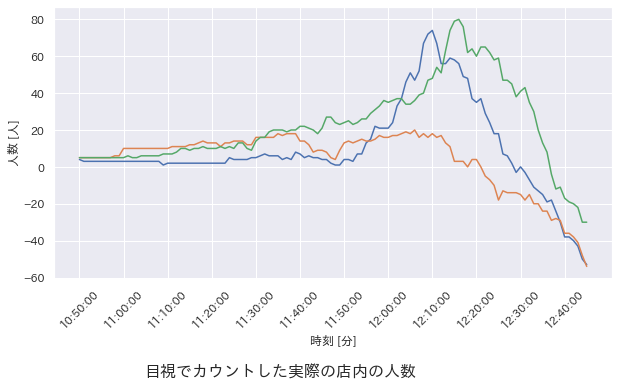

In [ ]:
df_05_stay = df_05_entry - df_05_exit
df_06_stay = df_06_entry - df_06_exit
df_07_stay = df_07_entry - df_07_exit


df_05_stay += 5
df_06_stay += 5
df_07_stay += 5


df_stay = pd.concat([df_05_stay, df_06_stay, df_07_stay], axis=1) 

fig = plt.figure(figsize=(10,5))
plt.grid()

plt.plot(df_stay)

ticks = 10
plt.xticks(range(0, len(df_stay), ticks), rotation=45)

title = '目視でカウントした実際の店内の人数'
plt.xlabel('時刻 [分]')
plt.ylabel('人数 [人]')

plt.grid()
fig.text(0.25, -0.15, title, fontsize=16)

plt.show()   

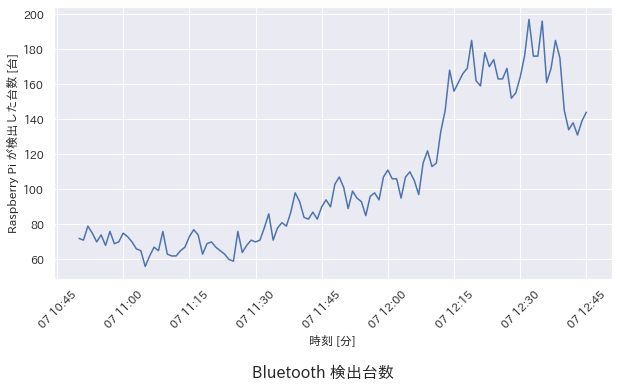

In [ ]:
df_rasp = pd.concat([df_rasp_07], axis=1) 

df_rasp = df_rasp.interpolate()
pd.plotting.register_matplotlib_converters()
fig = plt.figure(figsize=(10,5))
plt.grid()

plt.plot(df_rasp)

plt.xticks(rotation=45)

title = 'Bluetooth 検出台数'
plt.xlabel('時刻 [分]')
plt.ylabel('Raspberry Pi が検出した台数 [台]')

plt.grid()
fig.text(0.4, -0.15, title, fontsize=16)

plt.show()   

#### Bluetooth 検出台数と滞在者数の差分を算出

10:50と2限終わりの12:16、12:24あたりに差分が大きい。

## 線型回帰

In [ ]:
df_rasp = df_rasp.mean(axis='columns')
df_stay = df_stay.mean(axis='columns')

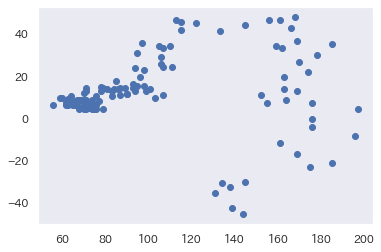

In [ ]:
plt.grid()
plt.scatter(df_rasp, df_stay) # 散布図をプロット

plt.show() 

In [ ]:
# Series を DataFrame に変換
df_rasp = df_rasp.to_frame()
df_stay = df_stay.to_frame()

df_rasp
df_stay

,0
時刻,
10:50:00,4.666667
10:51:00,4.333333
10:52:00,4.333333
10:53:00,4.333333
10:54:00,4.333333
...,...
12:41:00,-31.000000
12:42:00,-32.666667
12:43:00,-35.333333


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 説明変数
X = df_stay.values
# 目的変数
Y = df_rasp.values

lr.fit(X, Y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

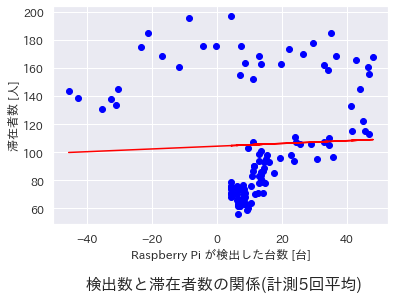

In [ ]:
fig = plt.figure()
plt.grid()
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット

title = '検出数と滞在者数の関係(計測5回平均)'            # 図のタイトル
plt.xlabel('Raspberry Pi が検出した台数 [台]') # x軸のラベル
plt.ylabel('滞在者数 [人]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示
fig.text(0.2, -0.1, title, fontsize=16)

plt.show()    

In [ ]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  [0.09795927]
intercept =  [104.36083643]



$y_t = 0.09795927x_t + 104.36083643 +\varepsilon_t$

ここでやりたいことは検出数から実際にいる人数を求めることなので，

$x_t \sim \frac{y_t-0.09795927}{104.36083643}$となる．

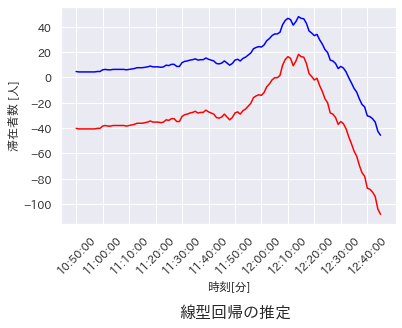

In [ ]:
fig = plt.figure()
plt.grid()

df_estimated = (df_stay - 34.49980095)/0.7412933

plt.plot(df_stay, color="blue")
plt.plot(df_estimated, color="red")

ticks = 10
plt.xticks(range(0, len(df_stay), ticks), rotation=45)

title = '線型回帰の推定'
plt.xlabel('時刻[分]') # x軸のラベル
plt.ylabel('滞在者数 [人]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示
fig.text(0.4, -0.2, title, fontsize=16)

plt.show()

In [ ]:
df_rasp.head()

,0
date,
2021-07-07 10:50:00,72.0
2021-07-07 10:51:00,71.0
2021-07-07 10:52:00,79.0
2021-07-07 10:53:00,75.0
2021-07-07 10:54:00,70.0


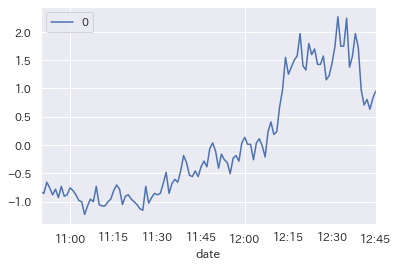

In [ ]:
import scipy
df_rasp_z = df_rasp.apply(scipy.stats.zscore, axis=0)
df_rasp_z.plot()
df_rasp_z =  df_rasp_z.reset_index()

In [ ]:
df_rasp_z = df_rasp_z.drop(columns=['date'], axis=1)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
params = sm.tsa.arma_order_select_ic(df_rasp, ic='aic', trend='nc')
params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



{'aic':             0            1            2
 0         NaN  1282.678622  1175.348413
 1  869.264790   864.961609   863.859627
 2  883.114684   871.763257   861.551654
 3  861.175365   860.944570   885.811293
 4  862.279785   862.594250   864.466568, 'aic_min_order': (3, 1)}

In [ ]:
arima_model = ARIMA(df_rasp, order=(0,1,2)).fit(dist=False)
resid = arima_model.resid
plt.plot(resid)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency T will be used.



TypeError: ignored

KeyError: ignored

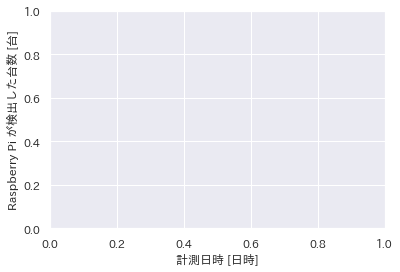

In [ ]:
fig = plt.figure()
title = 'ARIMA モデルの予測'            # 図のタイトル
plt.xlabel('計測日時 [日時]') # x軸のラベル
plt.ylabel('Raspberry Pi が検出した台数 [台]')    # y軸のラベル

predict = arima_model.predict('12:40:00', '12:50:00')
plt.plot(df_rasp_z) # 実データをプロット

plt.xticks(rotation=45)
plt.plot(predict) 
fig.text(0.25, -0.2, title, fontsize=16)

In [ ]:
predict

2021-06-18 12:40:00    0.500696
2021-06-18 12:41:00    0.099890
2021-06-18 12:42:00    0.232203
2021-06-18 12:43:00    0.171860
2021-06-18 12:44:00   -0.042440
2021-06-18 12:45:00   -0.041105
2021-06-18 12:46:00    0.382882
2021-06-18 12:47:00    0.000157
2021-06-18 12:48:00    0.000787
2021-06-18 12:49:00    0.000787
2021-06-18 12:50:00    0.000787
Freq: T, dtype: float64